In [2]:
# Import the libraries we will need to visualize our data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Get data from the csv data file
raw_data_df = pd.read_csv("../../data/raw_data.csv")
print(raw_data_df.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [3]:
# isolating the column I'll be working with
credit_history = raw_data_df["Credit_History"]

print(credit_history)

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
609    1.0
610    1.0
611    1.0
612    1.0
613    0.0
Name: Credit_History, Length: 614, dtype: float64


In [4]:
# replace empty rows with the mode of the column
credit_history=credit_history.fillna(raw_data_df["Credit_History"].mode()[0])
# the data now has been filled with the mode value where there are empty values
print(credit_history)

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
609    1.0
610    1.0
611    1.0
612    1.0
613    0.0
Name: Credit_History, Length: 614, dtype: float64


In [5]:
# count those with credit

has_credit = 0
no_credit = 0

# loop through each item in the credit history column and counting each outcome 
for row in credit_history:
    if row == 1:
        has_credit += 1
    else:
        no_credit += 1

print(has_credit)
print(no_credit)


525
89


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


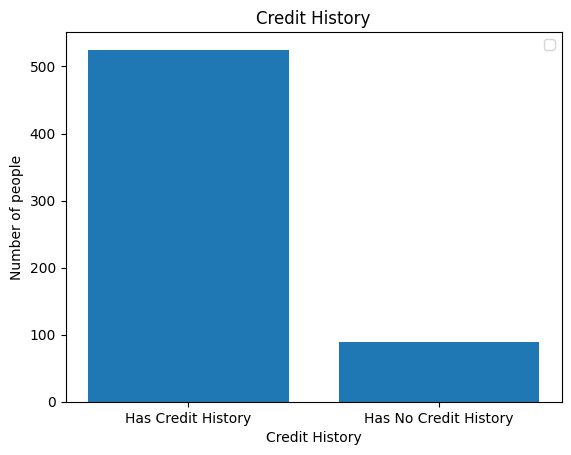

In [6]:
# Visualize our findings 
x_axis = ["Has Credit History", "Has No Credit History"] #labels for x-axis
y_axis = [has_credit, no_credit] #values for how high the graph should go

plt.bar(x_axis, y_axis) #creation of the bar graph 
plt.title("Credit History") 
plt.xlabel("Credit History")
plt.ylabel("Number of people")
plt.legend()
plt.show()

In [7]:
# The visuals of our graphs has indicated that more people have a credit history than those that dont in this dataset

# set the dataframe we're going to use for our bivariate analysis
columns = ["Credit_History", "Loan_Status"]
df = raw_data_df[columns].dropna() #drop the values that have empty strings

print(df.head())

   Credit_History Loan_Status
0             1.0           Y
1             1.0           N
2             1.0           Y
3             1.0           Y
4             1.0           Y


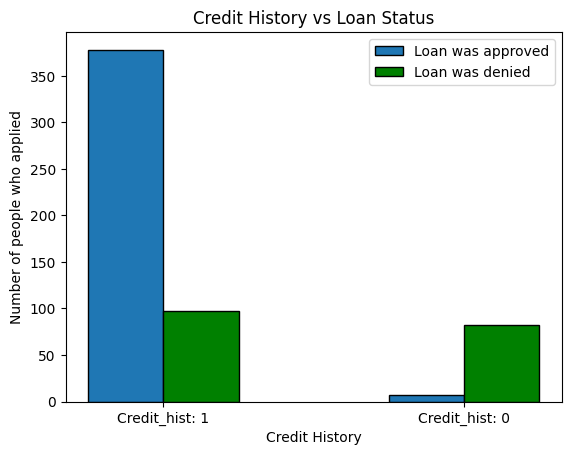

In [8]:
# Set variables to count outcomes
with_credit_yes = 0
with_credit_no = 0

without_credit_yes = 0
without_credit_no = 0

# loop through each and count their occurencess
for ndex, row in df.iterrows():
    if row["Credit_History"] == 1:
        if row["Loan_Status"] == "Y":
            with_credit_yes += 1
        else:
            with_credit_no += 1

    if row["Credit_History"] == 0:
        if row["Loan_Status"] == "Y":
            without_credit_yes += 1
        else:
            without_credit_no += 1

# set the outcomes for our double bar graph
yes_answers = [with_credit_yes, without_credit_yes]
no_answers = [with_credit_no, without_credit_no]

x_axis = np.arange(len(no_answers))
width = 0.25

plt.bar(x_axis, yes_answers,
        width=width, edgecolor='black',
        label='Loan was approved')
plt.bar(x_axis + width, no_answers, color='g',
        width=width, edgecolor='black',
        label='Loan was denied')

plt.xticks(x_axis + width/2, ['Credit_hist: 1', 'Credit_hist: 0'])
plt.xlabel("Credit History")
plt.ylabel("Number of people who applied")
plt.title("Credit History vs Loan Status")
plt.legend()
plt.show()

In [ ]:
# the findings from our graph clearly show that credit history has a large role to play in the decision on having a loan approved or not. Those with credit and have had loans approved are much higher than those without. 